In [147]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [148]:
cars_data = pd.read_csv('./Cardetails.csv')

In [149]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [150]:
cars_data.drop(columns=['torque'], inplace=True)

In [151]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [152]:
cars_data.shape

(8128, 12)

In [153]:
#preprocessing

In [154]:
#NULL ChecK

In [155]:
cars_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [156]:
cars_data.dropna(inplace=True)

In [157]:
cars_data.shape

(7907, 12)

In [158]:
#Duplicate Check

In [159]:
cars_data.duplicated().sum()

1189

In [160]:
cars_data.drop_duplicates(inplace=True)

In [161]:
cars_data.shape

(6718, 12)

In [162]:
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0


In [163]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6718 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.3+ KB


In [164]:
#Data Analysis

In [165]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000  

In [166]:
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip()

In [167]:
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [168]:
get_brand_name('Maruti  Swift Dzire VDI')

'Maruti'

In [169]:
cars_data['name'] = cars_data['name'].apply(get_brand_name)

In [170]:
cars_data['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [171]:
cars_data['mileage'] = cars_data['mileage'].apply(clean_data)

In [172]:
cars_data['max_power'] = cars_data['max_power'].apply(clean_data)

In [ ]:
cars_data['engine'] = cars_data['engine'].apply(clean_data)

In [174]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of name
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  10250

In [175]:
cars_data['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],
                          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
                          ,inplace=True)

C:\Users\hetsa\AppData\Local\Temp\ipykernel_25432\3086550428.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
C:\Users\hetsa\AppData\Local\Temp\ipykernel_25432\3086550428.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_do

In [176]:
cars_data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [177]:
cars_data['transmission'].replace(['Manual', 'Automatic'],[1,2], inplace=True)

C:\Users\hetsa\AppData\Local\Temp\ipykernel_25432\2474138088.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['transmission'].replace(['Manual', 'Automatic'],[1,2], inplace=True)
C:\Users\hetsa\AppData\Local\Temp\ipykernel_25432\2474138088.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

In [178]:
cars_data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [179]:
cars_data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3], inplace=True)

C:\Users\hetsa\AppData\Local\Temp\ipykernel_25432\355062479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3], inplace=True)
C:\Users\hetsa\AppData\Local\Temp\ipykernel_25432\355062479.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silen

In [180]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(6), object(2)
memory usage: 682.3+ KB


In [181]:
cars_data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [182]:
cars_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4], inplace=True)

C:\Users\hetsa\AppData\Local\Temp\ipykernel_25432\3825771590.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4], inplace=True)
C:\Users\hetsa\AppData\Local\Temp\ipykernel_25432\3825771590.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting

In [183]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   int64  
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 682.3+ KB


In [184]:
cars_data.reset_index(inplace=True)

In [185]:
cars_data

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,1,2014,450000,145500,1,1,1,First Owner,23.40,1248.0,74.00,5.0
1,1,2,2014,370000,120000,1,1,1,Second Owner,21.14,1498.0,103.52,5.0
2,2,3,2006,158000,140000,2,1,1,Third Owner,17.70,1497.0,78.00,5.0
3,3,4,2010,225000,127000,1,1,1,First Owner,23.00,1396.0,90.00,5.0
4,4,1,2007,130000,120000,2,1,1,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,8121,1,2013,260000,50000,2,1,1,Second Owner,18.90,998.0,67.10,5.0
6714,8122,4,2014,475000,80000,1,1,1,Second Owner,22.54,1396.0,88.73,5.0
6715,8123,4,2013,320000,110000,2,1,1,First Owner,18.50,1197.0,82.85,5.0
6716,8124,4,2007,135000,119000,1,1,1,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [186]:
cars_data['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [187]:
cars_data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'],
                           [1,2,3,4,5], inplace=True)

C:\Users\hetsa\AppData\Local\Temp\ipykernel_25432\821542758.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
C:\Users\hetsa\AppData\Local\Temp\ipykernel_25432\821542758.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ca

In [188]:
cars_data.drop(columns=['index'], inplace=True)

In [189]:
for col in cars_data.columns:
    print('------------')
    print(col)
    print(cars_data[col].unique())

------------
name
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
------------
year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
------------
selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000   290000
   455000   351000   535000   175000   565000   120000   725000   185000
   615000   270000   625000   866000   375000 

In [190]:
cars_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [191]:
input_data = cars_data.drop(columns=['selling_price'])
output_data =cars_data['selling_price']

In [192]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2)

In [193]:
#model Creation

In [194]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   int64  
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   int64  
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 629.9 KB


In [195]:
model = LinearRegression()

In [196]:
#Train MOdel

In [197]:
model.fit(x_train, y_train)

LinearRegression()

In [198]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [199]:
# Evaluate on training data
train_pred = model.predict(x_train)
train_r2 = r2_score(y_train, train_pred)
train_mse = mean_squared_error(y_train, train_pred)

In [200]:
# Evaluate on test data
test_pred = model.predict(x_test)
test_r2 = r2_score(y_test, test_pred)
test_mse = mean_squared_error(y_test, test_pred)

In [201]:
# Print results
print(f"Training R²: {train_r2:.4f}, Training MSE: {train_mse:.4f}")
print(f"Testing R²: {test_r2:.4f}, Testing MSE: {test_mse:.4f}")

Training R²: 0.6110, Training MSE: 107467561434.6936
Testing R²: 0.6389, Testing MSE: 95751526094.7336


In [202]:
# Determine if model is underfitting or overfitting
if train_r2 > 0.9 and test_r2 < 0.7:
    print("The model is overfitting (high training score, low test score). Consider regularization.")
elif train_r2 < 0.7 and test_r2 < 0.7:
    print("The model is underfitting (both scores are low). Consider adding features or using a more complex model.")
else:
    print("The model has a good balance between training and test performance.")

The model is underfitting (both scores are low). Consider adding features or using a more complex model.


In [203]:
model.score(x_test, y_test)

0.6389403635061054

In [204]:
x_train.head(1)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
3892,1,2011,70000,1,1,1,2,19.3,1248.0,73.9,5.0


In [205]:
input_data_model = pd.DataFrame(
    [[5,2022,12000,1,1,1,1,12.99,2494.0,100.6,5.0]],
    columns=['name','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats'])

In [206]:
input_data_model

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,5,2022,12000,1,1,1,1,12.99,2494.0,100.6,5.0


In [207]:
model.predict(x_test.head(10))

array([616008.11940154, 548539.77914058, 192483.31267044, 629586.29911026,
       716871.6502865 , 525905.7651875 , 119731.93940355, -93939.8317405 ,
       552156.76813753, 796069.67095381])

In [208]:
y_test.head(10)

4882    625000
1178    260000
2140     50000
3010    400000
5999    700000
5935    350000
685     200000
6398     65000
1108    650000
6336    700000
Name: selling_price, dtype: int64

In [209]:
from sklearn.svm import SVR
m = SVR(kernel="poly")
m.fit(x_train, y_train)
m.score(x_test, y_test)

-0.04472393364137206

In [210]:
from sklearn.ensemble import GradientBoostingRegressor
gm = GradientBoostingRegressor().fit(x_train, y_train)
gm.score(x_test, y_test)

0.9021820436407209

In [211]:
from sklearn.tree import DecisionTreeRegressor
m1 = DecisionTreeRegressor()
m1.fit(x_train, y_train)
m1.score(x_test, y_test)

0.8434754909291926

In [212]:
m1.score(x_train, y_train)

0.999140952778626

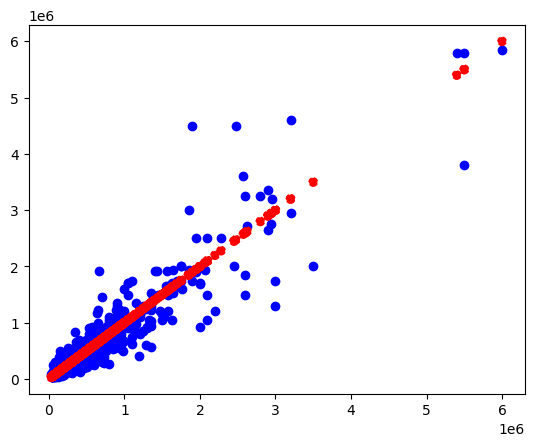

In [227]:
import matplotlib.pyplot as plt

plt.scatter(y_test, m1.predict(x_test), color='blue', label='Predicted vs Actual')  # Scatter plot
plt.scatter(y_test, y_test, color='red', linestyle='dashed', label='Perfect Prediction')  # Ideal line

In [214]:
model.predict(input_data_model)

array([985568.97930595])

In [215]:
model.score(x_test,y_test)

0.6389403635061054

In [216]:
# Implementing Linear Regression Manually
def linear_regression_manual(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # Normal equation
    return theta

def predict_manual(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
    return X_b.dot(theta)

# Train model
theta = linear_regression_manual(x_train, y_train)

# Evaluate on training data
train_pred = predict_manual(x_train, theta)
train_mse = np.mean((y_train - train_pred) ** 2)
train_r2 = 1 - (np.sum((y_train - train_pred) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2))

# Evaluate on test data
test_pred = predict_manual(x_test, theta)
test_mse = np.mean((y_test - test_pred) ** 2)
test_r2 = 1 - (np.sum((y_test - test_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

# Print results
print(f"Training R²: {train_r2:.4f}, Training MSE: {train_mse:.4f}")
print(f"Testing R²: {test_r2:.4f}, Testing MSE: {test_mse:.4f}")

# Determine if model is underfitting or overfitting
if train_r2 > 0.9 and test_r2 < 0.7:
    print("The model is overfitting (high training score, low test score). Consider regularization.")
elif train_r2 < 0.7 and test_r2 < 0.7:
    print("The model is underfitting (both scores are low). Consider adding features or using a more complex model.")
else:
    print("The model has a good balance between training and test performance.")

Training R²: 0.6110, Training MSE: 107467561434.6937
Testing R²: 0.6389, Testing MSE: 95751526095.0511
The model is underfitting (both scores are low). Consider adding features or using a more complex model.


In [217]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(m1, x_train, y_train, cv=5, scoring='r2')  # 5-fold CV
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean R2 Score:", cv_scores.mean())


Cross-Validation R2 Scores: [0.86605466 0.69660452 0.84982526 0.79080136 0.79999831]
Mean R2 Score: 0.8006568224552779


In [218]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = m1.predict(x_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


R² Score: 0.8435
MAE: 101733.1303
MSE: 41509654084.5607
RMSE: 203739.1815


In [219]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
print("Test Score:", grid_search.score(x_test, y_test))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-Validation Score: 0.8108930664834262
Test Score: 0.8981383035606101


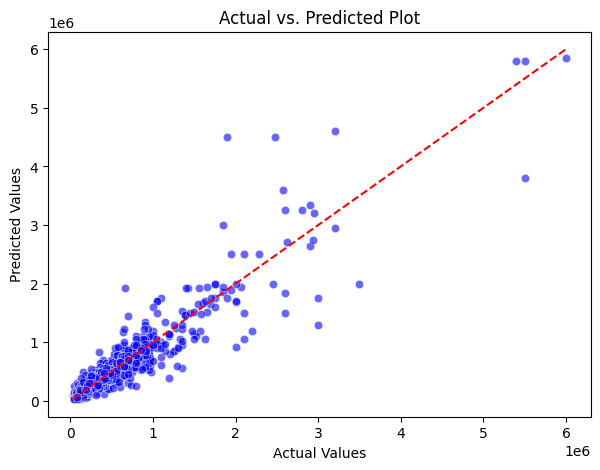

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = m1.predict(x_test)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')  # Ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Plot")
plt.show()


In [221]:
y_pred = m1.predict(x_test)

In [222]:
residuals = y_test - y_pred  # Define residuals properly


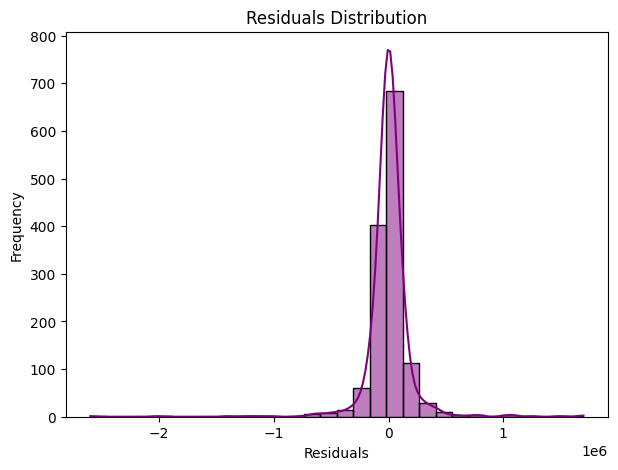

In [223]:
plt.figure(figsize=(7, 5))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()


C:\Users\hetsa\AppData\Local\Temp\ipykernel_25432\2769146108.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette="viridis")


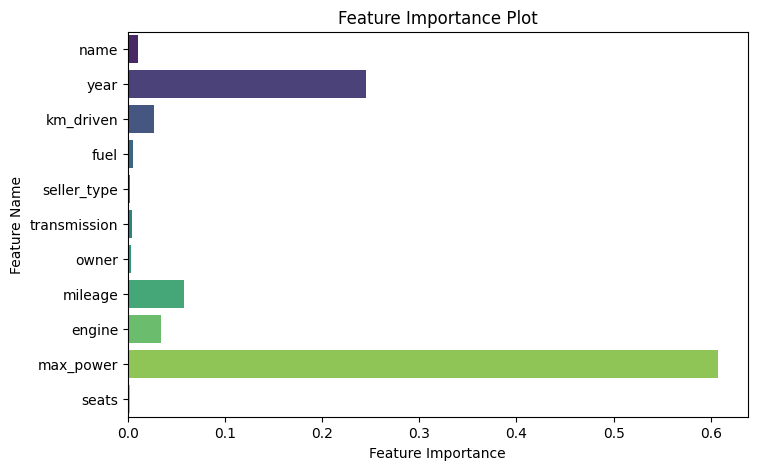

In [224]:
import numpy as np

feature_importances = m1.feature_importances_  # Only for tree-based models
feature_names = x_train.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance Plot")
plt.show()


C:\Users\hetsa\AppData\Local\Temp\ipykernel_25432\294703615.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()), palette="coolwarm")


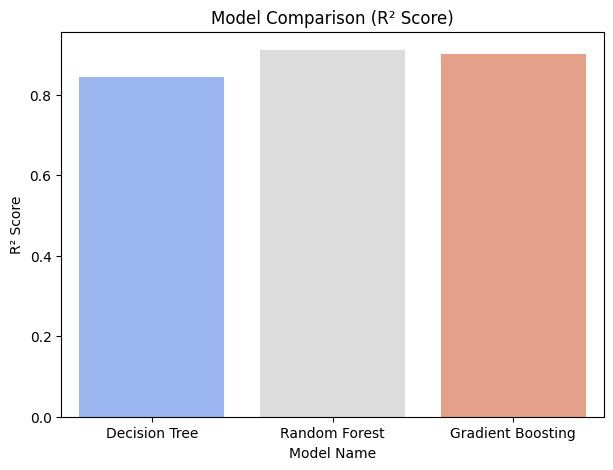

In [225]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
models = {
    "Decision Tree": m1,
    "Random Forest": RandomForestRegressor().fit(x_train, y_train),
    "Gradient Boosting": GradientBoostingRegressor().fit(x_train, y_train),
}

r2_scores = {name: r2_score(y_test, model.predict(x_test)) for name, model in models.items()}

plt.figure(figsize=(7, 5))
sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()), palette="coolwarm")
plt.xlabel("Model Name")
plt.ylabel("R² Score")
plt.title("Model Comparison (R² Score)")
plt.show()


In [228]:
import joblib

# Save the model
joblib.dump(m1, 'decision_tree_regressor.pkl')

# Load the model later when needed
loaded_model = joblib.load('decision_tree_regressor.pkl')

# Test the loaded model
y_pred_loaded = loaded_model.predict(x_test)


In [229]:
import joblib

# Save the model
joblib.dump(gm, 'gradient_boosting_regressor.pkl')

# Load the model later when needed
loaded_model = joblib.load('gradient_boosting_regressor.pkl')

# Test the loaded model
y_pred_loaded = loaded_model.predict(x_test)


In [233]:
m1.predict(x_test.head(5))

array([600000., 300000., 250000., 360000., 650000.])

In [234]:
y_test.head(5)

4882    625000
1178    260000
2140     50000
3010    400000
5999    700000
Name: selling_price, dtype: int64

In [235]:
gm.predict(x_test.head(5))

array([768563.17579496, 304161.14498055, 138332.29054326, 358156.00169804,
       678532.39819156])